### PAIR I MÓDULO 3: Introducción al Machine Learning

Para los ejercicios de Pair hemos utilizado el siguiente dataset: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

Los objetivos de hoy son:
1. Buscar un conjunto de datos a analizar:
    - Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
    - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [11]:
df = pd.read_csv('data/spotify_songs.csv', index_col= 0)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**! Visto el volumen de la muestra (no es posible finalizar el random forest), vamos a hacer un sample a 20.000 datos:**

In [12]:
#Aunque está ejecutada, vamos a evitar que se vuelva a ejecutar por error y cambie los valores y afecte a los siguientes jupyters. 
# En siguientes casos hemos usado random_state para que siempre saque el mismo random y esto no pase:
"df = df.sample(12000).reset_index().drop("index", axis= 1)"

In [13]:
df.shape

(12000, 20)

In [14]:
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,0,-7.764,0,0.2460,0.147,0.000000,0.1510,0.422,87.328,4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,7,-5.874,1,0.4080,0.117,0.000000,0.0855,0.449,199.995,4,dancehall
2,36NwMJRaCy7x77xYGJiG2M,Allman Brothers Band,Fishing Music,Midnight Rider,1,177960,False,0.346,0.589,7,-9.922,1,0.0360,0.210,0.007030,0.1500,0.638,189.486,4,hard-rock
3,7CdWPnD06ONtWrKmv3dQYH,Sirkazhi Govindarajan,Kathalikka Neramillai,Kaadhalikka Neramillai,32,313933,False,0.438,0.633,8,-9.970,1,0.1070,0.929,0.160000,0.0855,0.860,78.673,4,classical
4,73fRMyckZKtemX14eku8uu,Sertab Erener,İyiliğe Ninniler,Dandini Dandini Dastana,48,149168,False,0.506,0.233,3,-12.077,0,0.0276,0.957,0.000028,0.1160,0.275,88.080,4,songwriter


In [15]:
# Vamos a limpiar la columnas "mode" (falsa numérica):
mode = {1: "major", 0: "minor"}
df["mode"] = df["mode"].map(mode)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,0,-7.764,minor,0.2460,0.147,0.000000,0.1510,0.422,87.328,4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,7,-5.874,major,0.4080,0.117,0.000000,0.0855,0.449,199.995,4,dancehall
2,36NwMJRaCy7x77xYGJiG2M,Allman Brothers Band,Fishing Music,Midnight Rider,1,177960,False,0.346,0.589,7,-9.922,major,0.0360,0.210,0.007030,0.1500,0.638,189.486,4,hard-rock
3,7CdWPnD06ONtWrKmv3dQYH,Sirkazhi Govindarajan,Kathalikka Neramillai,Kaadhalikka Neramillai,32,313933,False,0.438,0.633,8,-9.970,major,0.1070,0.929,0.160000,0.0855,0.860,78.673,4,classical
4,73fRMyckZKtemX14eku8uu,Sertab Erener,İyiliğe Ninniler,Dandini Dandini Dastana,48,149168,False,0.506,0.233,3,-12.077,minor,0.0276,0.957,0.000028,0.1160,0.275,88.080,4,songwriter


In [16]:
# Vamos a limpiar la columna "key" (falsa numérica):
mapa_key = {0 : 'C',1 : 'C_D',2 : 'D',3 : 'D_E',4 : 'E',5 : 'F',6 : 'F_G',7 : 'G',8 : 'G_A',9 : 'A',10 : 'A_B',11 : 'B'}
df["key"] = df["key"].map(mapa_key)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,C,-7.764,minor,0.2460,0.147,0.000000,0.1510,0.422,87.328,4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,G,-5.874,major,0.4080,0.117,0.000000,0.0855,0.449,199.995,4,dancehall
2,36NwMJRaCy7x77xYGJiG2M,Allman Brothers Band,Fishing Music,Midnight Rider,1,177960,False,0.346,0.589,G,-9.922,major,0.0360,0.210,0.007030,0.1500,0.638,189.486,4,hard-rock
3,7CdWPnD06ONtWrKmv3dQYH,Sirkazhi Govindarajan,Kathalikka Neramillai,Kaadhalikka Neramillai,32,313933,False,0.438,0.633,G_A,-9.970,major,0.1070,0.929,0.160000,0.0855,0.860,78.673,4,classical
4,73fRMyckZKtemX14eku8uu,Sertab Erener,İyiliğe Ninniler,Dandini Dandini Dastana,48,149168,False,0.506,0.233,D_E,-12.077,minor,0.0276,0.957,0.000028,0.1160,0.275,88.080,4,songwriter


In [18]:
# Vamos a limpiar la columna "time_signature" (falsa numérica):
mapa_time_signature = {0: 'compas_1', 1: 'compas_2', 3: 'compas_3', 4: 'compas_4', 5: 'compas_5'}
df["time_signature"] = df["time_signature"].map(mapa_time_signature)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,C,-7.764,minor,0.2460,0.147,0.000000,0.1510,0.422,87.328,compas_4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,G,-5.874,major,0.4080,0.117,0.000000,0.0855,0.449,199.995,compas_4,dancehall
2,36NwMJRaCy7x77xYGJiG2M,Allman Brothers Band,Fishing Music,Midnight Rider,1,177960,False,0.346,0.589,G,-9.922,major,0.0360,0.210,0.007030,0.1500,0.638,189.486,compas_4,hard-rock
3,7CdWPnD06ONtWrKmv3dQYH,Sirkazhi Govindarajan,Kathalikka Neramillai,Kaadhalikka Neramillai,32,313933,False,0.438,0.633,G_A,-9.970,major,0.1070,0.929,0.160000,0.0855,0.860,78.673,compas_4,classical
4,73fRMyckZKtemX14eku8uu,Sertab Erener,İyiliğe Ninniler,Dandini Dandini Dastana,48,149168,False,0.506,0.233,D_E,-12.077,minor,0.0276,0.957,0.000028,0.1160,0.275,88.080,compas_4,songwriter


In [19]:
df.to_pickle('data/spotify_songs_limpio.pkl')

In [20]:
df.shape

(12000, 20)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12000 non-null  object 
 1   artists           11999 non-null  object 
 2   album_name        11999 non-null  object 
 3   track_name        11999 non-null  object 
 4   popularity        12000 non-null  int64  
 5   duration_ms       12000 non-null  int64  
 6   explicit          12000 non-null  bool   
 7   danceability      12000 non-null  float64
 8   energy            12000 non-null  float64
 9   key               12000 non-null  object 
 10  loudness          12000 non-null  float64
 11  mode              12000 non-null  object 
 12  speechiness       12000 non-null  float64
 13  acousticness      12000 non-null  float64
 14  instrumentalness  12000 non-null  float64
 15  liveness          12000 non-null  float64
 16  valence           12000 non-null  float6

In [22]:
df.duplicated().sum()

5

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.describe(include="O").T

,count,unique,top,freq
track_id,11995,11586,1bKQ48M9onID2kbSpRy8kK,3
artists,11994,7364,George Jones,29
album_name,11994,8958,Alternative Christmas 2022,21
track_name,11994,10730,Run Rudolph Run,20
key,11995,12,G,1438
mode,11995,2,major,7680
time_signature,11995,5,compas_4,10691
track_genre,11995,114,garage,131


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,11995.0,33.336140,22.313139,0.00000,17.00000,35.000000,50.0000,98.000
duration_ms,11995.0,226782.010254,98365.217292,0.00000,173673.00000,212906.000000,262261.0000,3600120.000
danceability,11995.0,0.566814,0.171232,0.00000,0.45800,0.581000,0.6930,0.977
energy,11995.0,0.639014,0.250959,0.00002,0.46750,0.679000,0.8520,1.000
loudness,11995.0,-8.278611,5.004865,-43.71400,-10.01400,-6.999000,-5.0355,1.682
speechiness,11995.0,0.086124,0.111430,0.00000,0.03570,0.048500,0.0846,0.963
acousticness,11995.0,0.324232,0.333104,0.00000,0.01865,0.186000,0.6130,0.996
instrumentalness,11995.0,0.152935,0.306807,0.00000,0.00000,0.000041,0.0449,1.000
liveness,11995.0,0.216737,0.194508,0.01500,0.09860,0.133000,0.2770,0.994
valence,11995.0,0.475171,0.258548,0.00000,0.26350,0.465000,0.6840,0.987


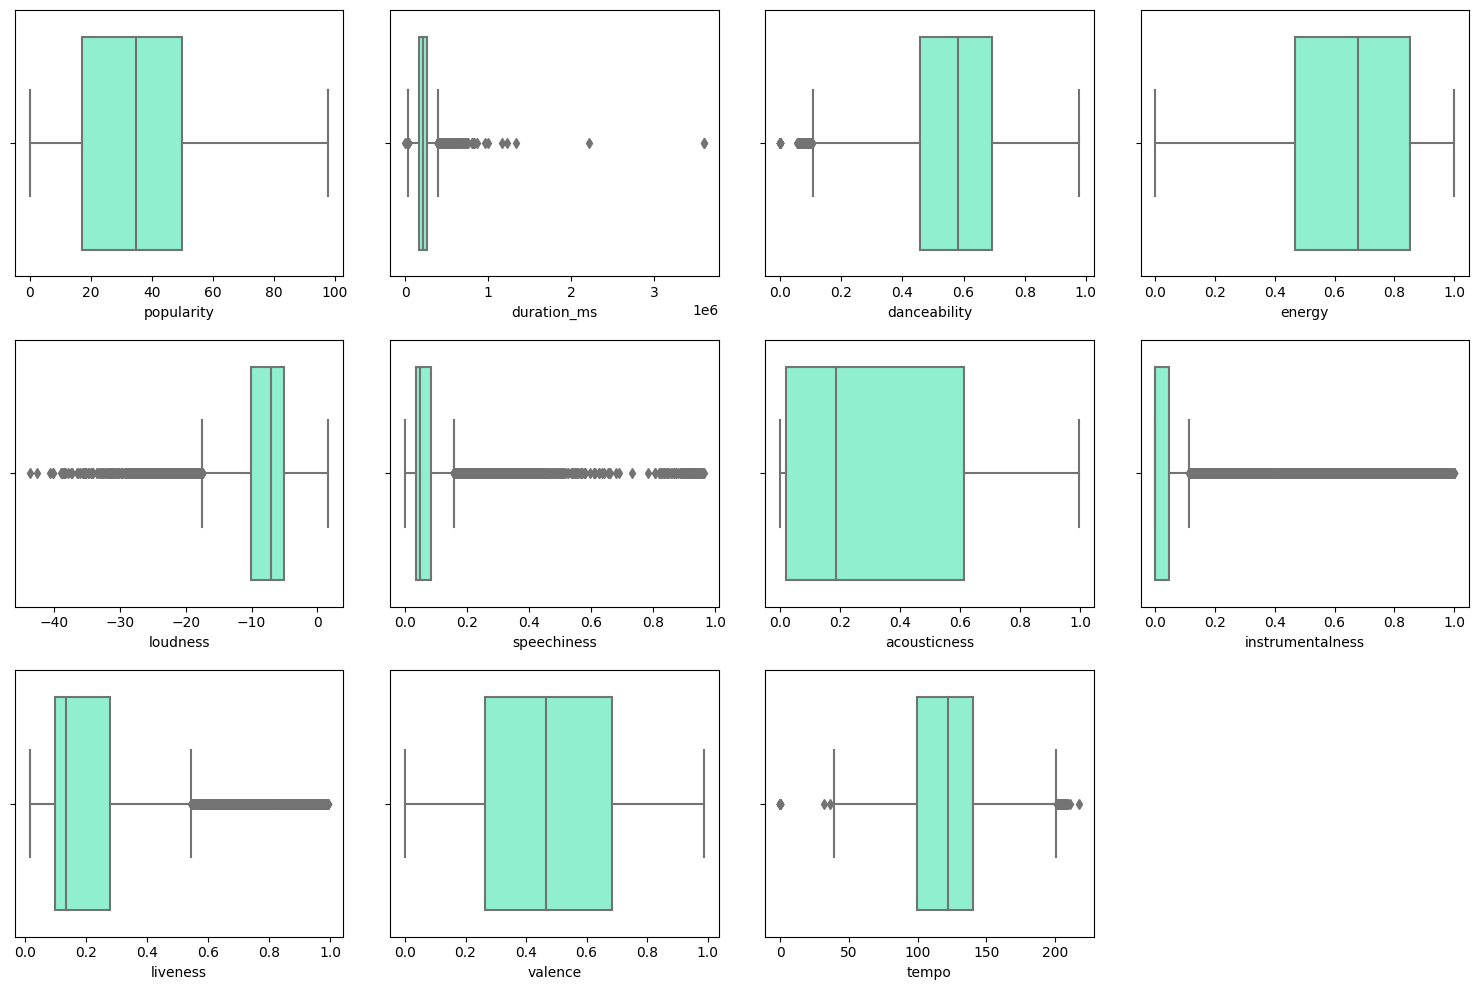

In [27]:
numericas = df.select_dtypes(np.number)

fig, axes = plt.subplots(3, 4, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

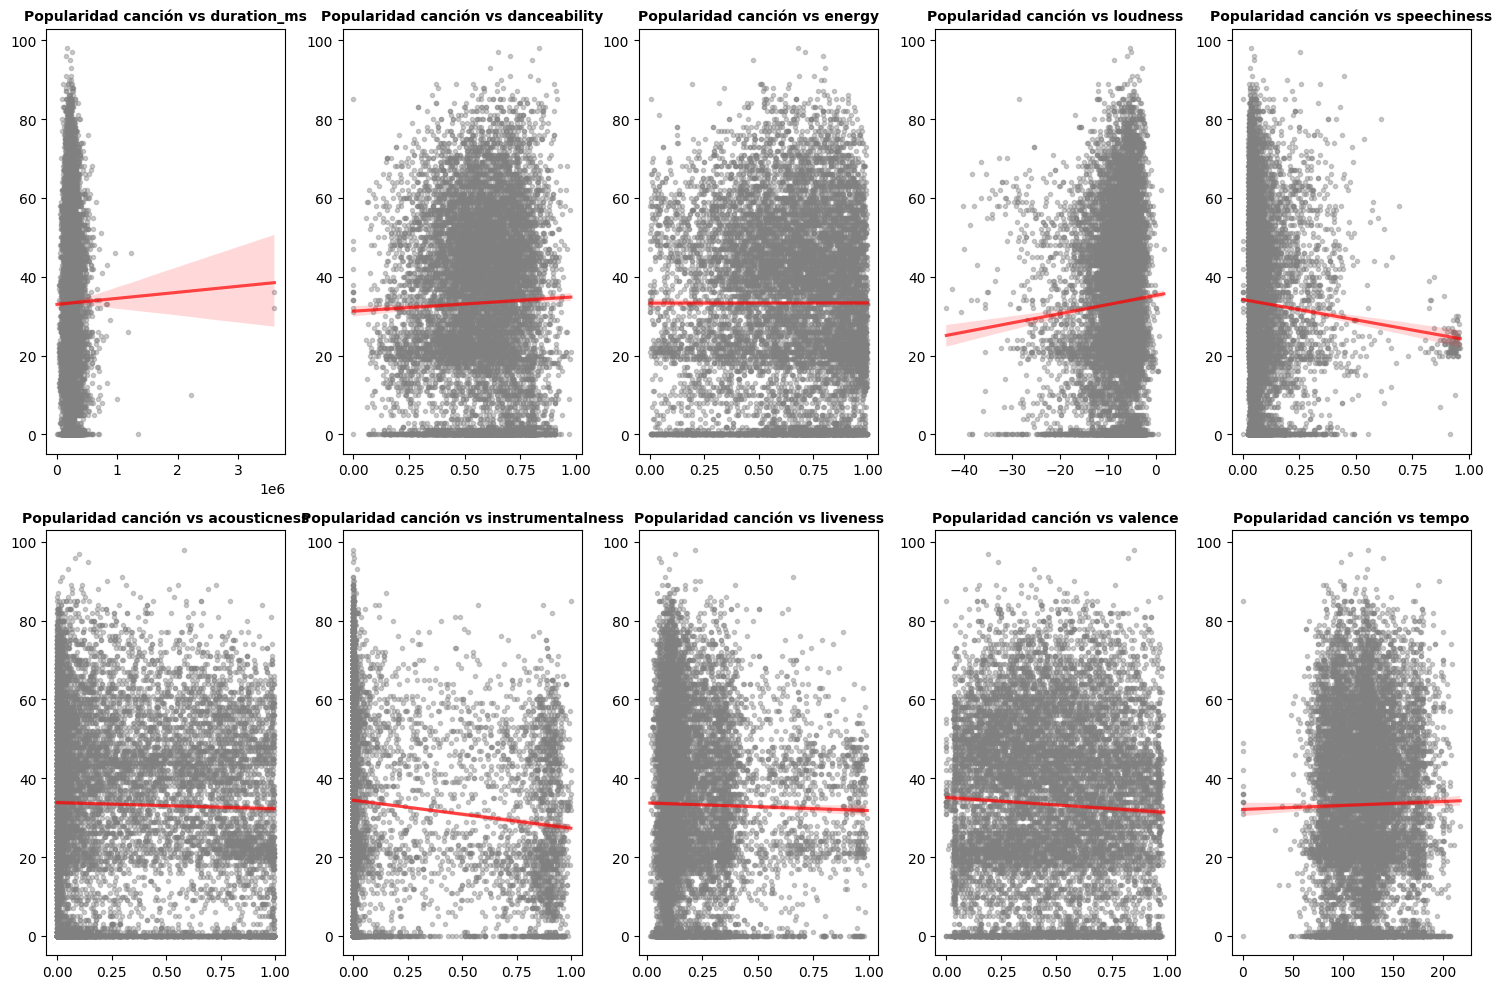

In [28]:
fig, axes = plt.subplots(2, 5, figsize = (15, 10))


axes = axes.flat

columnas_numeric = numericas.columns
columnas_numeric = columnas_numeric.drop("popularity")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["popularity"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Popularidad canción vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

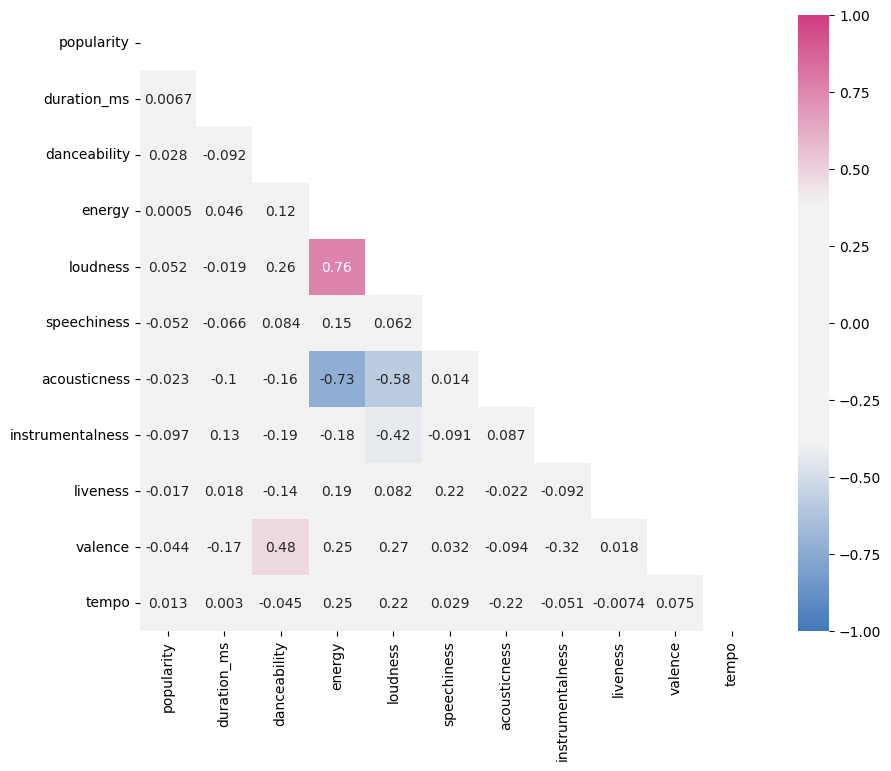

In [29]:
mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool_))

cmap = sns.diverging_palette(250, 349, sep=100, as_cmap=True)

sns.heatmap(numericas.corr(), 
           cmap = cmap, 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1)

plt.savefig('heatmap.png');

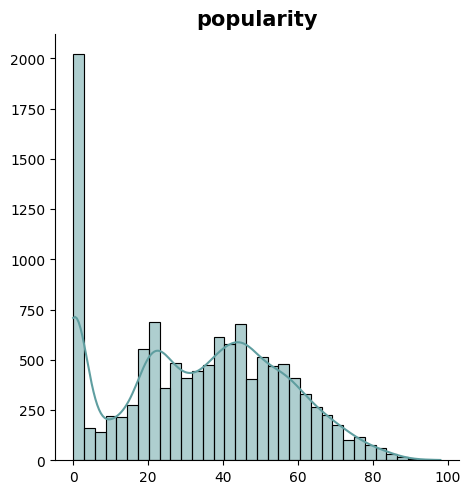

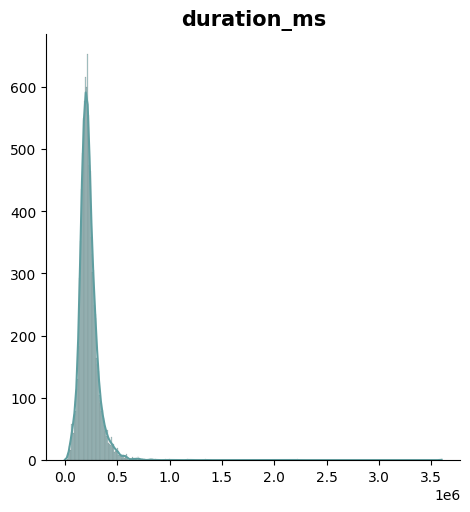

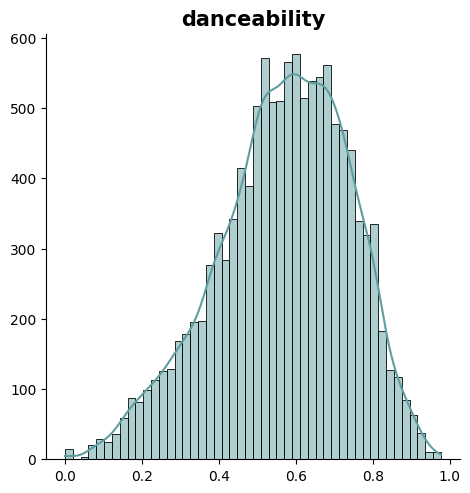

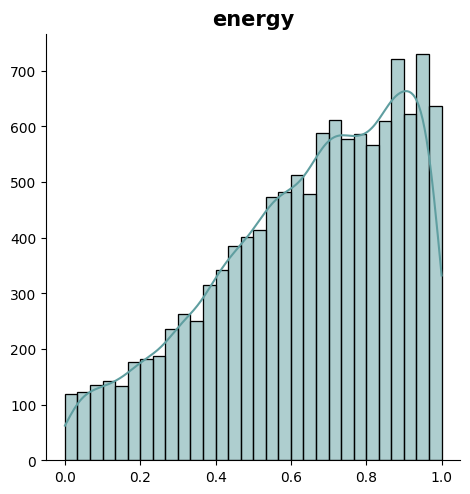

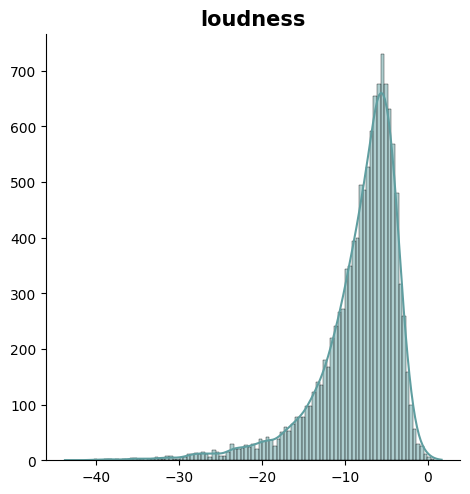

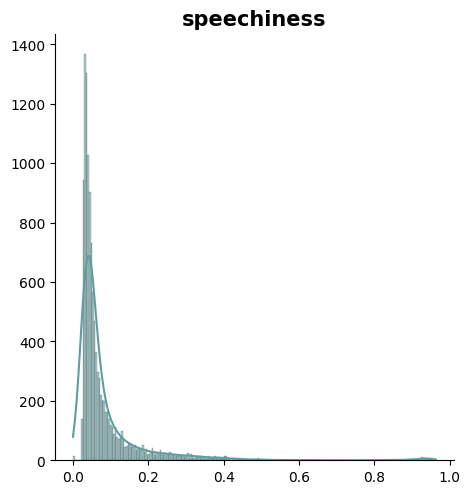

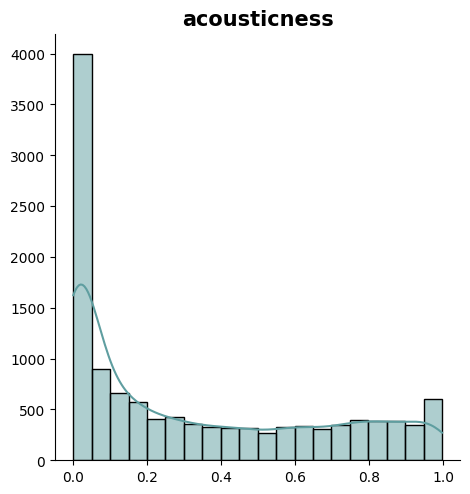

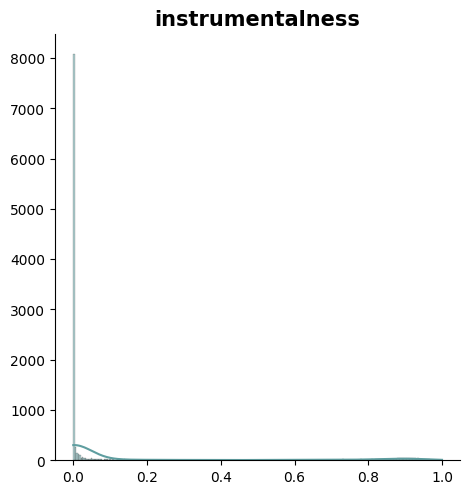

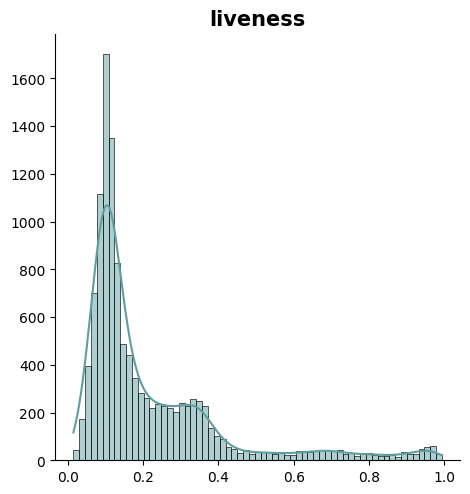

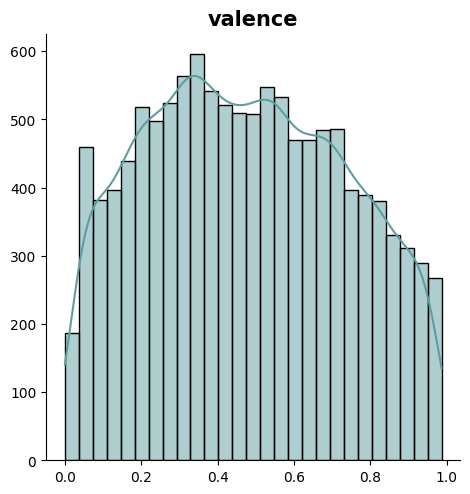

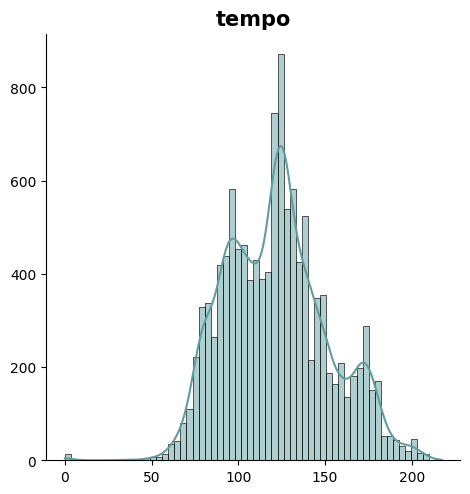

In [30]:
columnas_numeric_all = numericas.columns

for i, colum in enumerate(columnas_numeric_all):

    sns.displot(df[colum], kde=True, color="cadetblue")
    plt.title(colum, fontsize=15, fontweight="bold")
    plt.xlabel("")
    plt.ylabel("");